# Cellpose Script

## Load Packages

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
from cellpose import models,utils,io
import glob, os
from czifile import CziFile
from PIL import Image
import tifffile

# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(model_type='nuclei', gpu=True)

>>>> using GPU


## Load images

In [137]:
# list of files
# direc = 'C://Users/gloss/Desktop'
# direc = 'D:/INMED/CFOS/Images/TEST'
direc = 'C:/Users/cavalieri/Desktop/cellpose_test'
os.chdir(direc)
files = glob.glob('*.czi')

imgs = [None] * len(files)
for ind,f in enumerate(files):
    with CziFile(f) as czi:
        image = czi.asarray()
    imgs[ind] = np.squeeze(image)
    
nimg = len(imgs)

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
channels = [0,0]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended)
# diameter can be a list or a single number for all images

# divide channels 
imgs_tdt = [None] * nimg 
imgs_cfos = [None] * nimg 
imgs_dapi = [None] * nimg 
  
    
#  convert pictures into .Tiff    
for ind,img in enumerate(imgs):
    #select one channel    
    imgs_tdt[ind] = img[1,:,:,:].reshape(1,7, 1, 512, 512, 1)
    imgs_cfos[ind] = img[0,:,:,:].reshape(1,7, 1, 512, 512, 1)
    imgs_dapi[ind] = img[2,:,:,:].reshape(1,7, 1, 512, 512, 1)
    
    tiffname_red = files[ind].split('.')[0] + '_red.tiff'
    tiffname_blue = files[ind].split('.')[0] + '_blue.tiff'
    tiffname_green = files[ind].split('.')[0] + '_green.tiff'
    
    green_path = 
    blue_path = 
    red_path =
    tifffile.imwrite(tiffname_blue, imgs_dapi[ind], metadata={'axes': 'TZCYXS'})
    tifffile.imwrite(tiffname_green, imgs_cfos[ind],  metadata={'axes': 'TZCYXS'})
    tifffile.imwrite(tiffname_red, imgs_tdt[ind], append=True, metadata={'axes': 'TZCYXS'})
        

## Plot


(5, 256, 256)


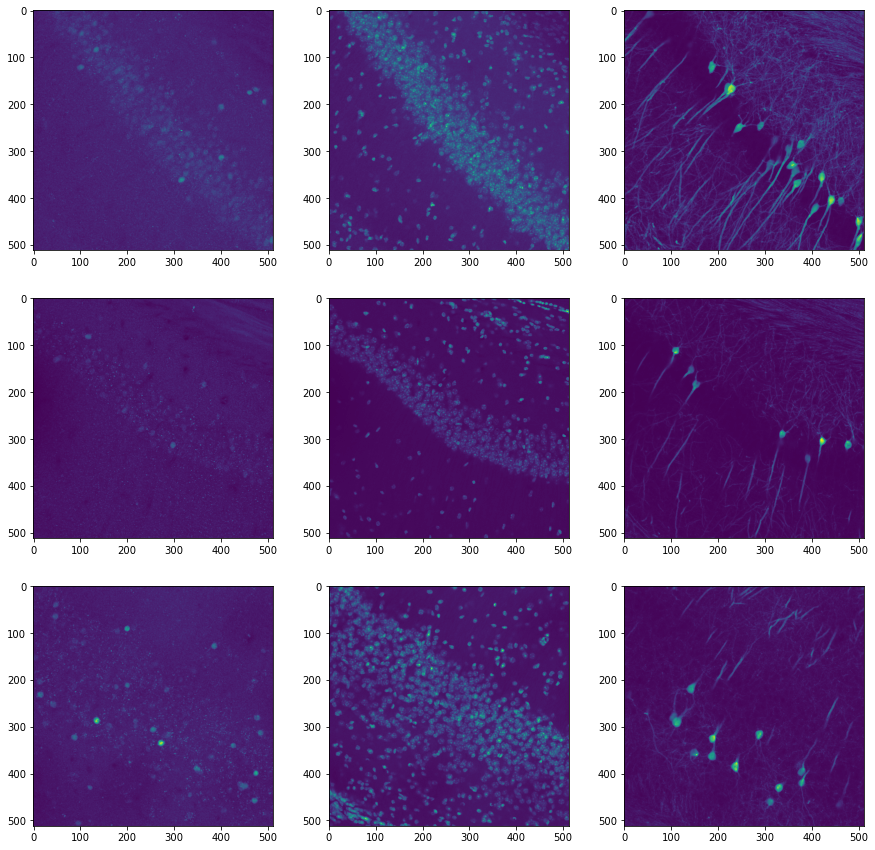

In [98]:
# plt.ion()
# %matplotlib qt

fig, axs = plt.subplots(nimg,3,figsize=(15,15))
axs = axs.ravel()
for ind in range(nimg):
    axs[ind*nimg].imshow(np.mean(imgs_cfos[ind],0))
    axs[ind*nimg+1].imshow(np.mean(imgs_dapi[ind],0))
    axs[ind*nimg+2].imshow(np.mean(imgs_tdt[ind],0))
    
    
down_sampled = [None] * nimg 
for ind, img in enumerate(imgs_tdt):
    down_sampled[ind]=img[0:5,0::2,0::2]
    
print(down_sampled[0].shape)

## Execute cellpose

In [77]:
diam_est = 0
channels = [0,0]
masks, flows, styles, diams = model.eval(down_sampled[0], diameter=diam_est, channels=channels, do_3D=True)

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

multi-stack tiff read in as having 5 planes 1 channels
processing 1 image(s)

 running XY (256, 256) 




  0%|                                                                                          | 0/256 [00:00<?, ?it/s]


 running XZ (5, 256) 




  0%|                                                                                          | 0/256 [00:00<?, ?it/s]


 running YZ (5, 256) 




100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [04:58<00:00,  1.16s/it]


flows computed 599.18s
dynamics computed 599.92s
masks computed 600.34s


## Save results

In [80]:
io.masks_flows_to_seg(down_sampled[0], masks, flows, diams, files[0] ,channels=channels)
# io.save_to_png(down_sampled[0], masks, flows, files[0])
# io.save_to_png(img, masks[ind], flows[ind], files[ind])

# io.masks_flows_to_seg(chan_to_analyse, masks, flows[0], diams, files[ind], channels=0)
# for ind,img in enumerate(imgs_tdt):
#     io.masks_flows_to_seg(img, masks[ind], flows[ind], diams[ind], files[ind], channels= [0,0])
#     io.save_to_png(img, masks[ind], flows[ind], files[ind])

## Other garbage...

In [113]:
# tosave = down_sampled[0].astype(np.uint8)
# print(tosave.shape)
# tosave.shape = 1, 5, 1, 256, 256, 1  # dimensions in TZCYXS order
# print(tosave.shape)

# for ind,img in enumerate(imgs_tdt):
#     tiffname = files[ind].split('.')[0] + '_RED.tiff'
# #     print(tiffname)
#     img.shape = 1, 7, 1, 512, 512, 1
#     tifffile.imwrite(tiffname, img,metadata={'axes': 'TZCYXS'},imagej=True)
    
    
for ind,img in enumerate(imgs):
    tiffname = files[ind].split('.')[0] + '.tiff'
#     print(tiffname)
    img.shape = 1, 7, 3, 512, 512, 1
    tifffile.imwrite(tiffname, img,metadata={'axes': 'TZCYXS'},imagej=True)